Given the root of a binary tree, each node in the tree has a distinct value.
<br>
After deleting all nodes with a value in to_delete, we are left with a forest (a disjoint union of trees).
<br>
Return the roots of the trees in the remaining forest. You may return the result in any order.<br>
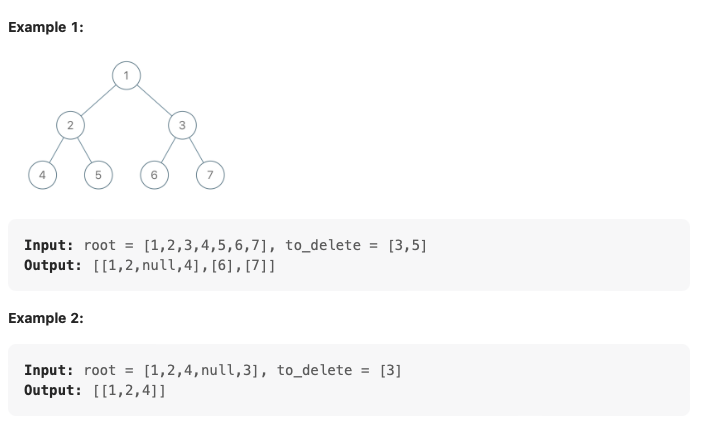

In [14]:
class TreeNode:
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right
a = TreeNode(1)
b = TreeNode(2)
c = TreeNode(3)
a.left = b
a.right = c
d = TreeNode(4)
e = TreeNode(5)
b.left = d
b.right = e
f = TreeNode(6)
g = TreeNode(7)
c.left = f
c.right = g

In [17]:
class Solution:
    def delNodes(self, root, to_delete):
        to_delete = set(to_delete)
        self.forest = []
        
        self.dfs(root, to_delete, True)
        
        return self.forest
    
    def dfs(self, node, to_delete, is_root):
        if not node:
            return
        
        if node.val in to_delete:
            self.dfs(node.left, to_delete, True)
            self.dfs(node.right, to_delete, True)
        else:
            if node.left:
                if node.left.val in to_delete:
                    self.dfs(node.left, to_delete,True)
                    node.left = None
                else:
                    self.dfs(node.left, to_delete,False)
            if node.right:
                if node.right.val in to_delete:
                    self.dfs(node.right, to_delete,True)
                    node.right = None
                else:
                    self.dfs(node.right, to_delete,False)
            if is_root:
                self.forest.append(node)

In [18]:
to_delete = [3,5]
b = Solution()
b.delNodes(a,to_delete)